### Algorithm: CNN-LSTM including normalization
### Created: Julio 31 ,2024
### Dataset : ArticullaryWord Recognition
### Authors: Edgar Acuna and Roxana Aparicio


In [1]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
#from keras.models import Sequential
##from keras.layers import Dense
#from keras.layers import Flatten
#from keras.layers import Dropout
#from keras.layers import LSTM
#from keras.layers import TimeDistributed
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score, ConfusionMatrixDisplay
import tensorflow.keras.layers as layers
import keras
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
#from keras.layers import TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, LSTM, TimeDistributed
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

# load a single file as a numpy array
#def load_file(filepath):
#    dataframe = read_csv(filepath, header=None)
#    return dataframe.values

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y, meta_data = load_classification(dataset, split="Train")
    else:
        X, y, meta_data = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [ ]:
# loading Training data
X, y = load_data("ArticularyWordRecognition",split="Train")
print(y.shape)

In [2]:
# loading Testing data
Xt, yt = load_data("ArticularyWordRecognition",split="Test")

NameError: name 'load_data' is not defined

(575, 144, 9)


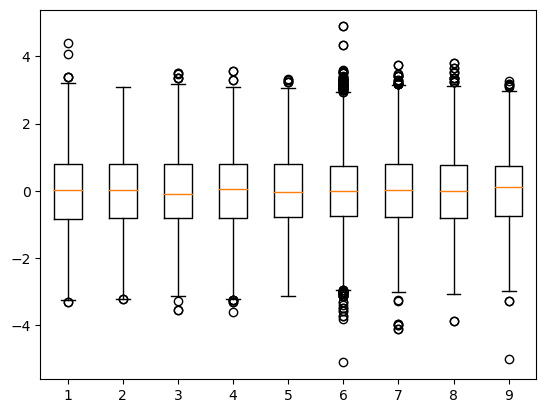

In [5]:
#Boxlots before normalization
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)
tempo1=X.reshape(Xb.shape[2],-1).T
pyplot.boxplot(tempo1)
pyplot.show()

(82800, 9)


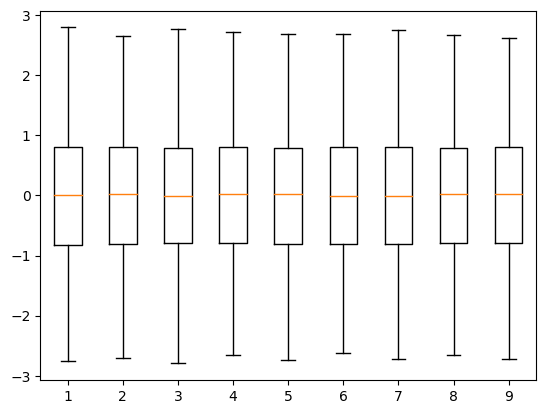

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
tempo=Xb.reshape(Xb.shape[2],-1).T
X1 = scaler.fit_transform(tempo)
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [7]:
Xn1=Xb[0:275]
print(Xn1.shape)
Xn2=Xb[275:575]
print(Xn2.shape)

(275, 144, 9)
(300, 144, 9)


In [124]:
# define model
import time
verbose, epochs, batch_size = 1, 300, 32
#trainX, trainy, testX, testy = trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
trainX=Xn1
trainy=y
testX=Xn2
testy=yt
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
print(n_features)
# reshape data into time steps of sub-sequences
n_steps, n_length =2,72
#For P#n_steps, n_length = 5, 20
print(trainX.shape)
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
print(trainX.shape)
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
#print("number of features",n_features)
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=2, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
#model.add(TimeDistributed(Dropout(0.5)))
#model.add(TimeDistributed(Conv1D(filters=1024, kernel_size=2, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model.add(TimeDistributed(Flatten()))
#model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.summary()
start_time=time.time()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
test_results= model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#print(test_results)

9
(275, 144, 9)
(275, 2, 72, 9)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_63 (TimeDi  (None, None, 71, 32)     608       
 stributed)                                                      
                                                                 
 time_distributed_64 (TimeDi  (None, None, 35, 32)     0         
 stributed)                                                      
                                                                 
 time_distributed_65 (TimeDi  (None, None, 34, 64)     4160      
 stributed)                                                      
                                                                 
 time_distributed_66 (TimeDi  (None, None, 17, 64)     0         
 stributed)                                                      
                                                                 
 time_distributed_67 (

9/9 [==============================] - 0s 15ms/step - loss: 1.1052e-04 - accuracy: 1.0000
Epoch 136/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0865e-04 - accuracy: 1.0000
Epoch 137/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0684e-04 - accuracy: 1.0000
Epoch 138/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0508e-04 - accuracy: 1.0000
Epoch 139/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0331e-04 - accuracy: 1.0000
Epoch 140/300
9/9 [==============================] - 0s 15ms/step - loss: 1.0165e-04 - accuracy: 1.0000
Epoch 141/300
9/9 [==============================] - 0s 15ms/step - loss: 9.9985e-05 - accuracy: 1.0000
Epoch 142/300
9/9 [==============================] - 0s 15ms/step - loss: 9.8382e-05 - accuracy: 1.0000
Epoch 143/300
9/9 [==============================] - 0s 15ms/step - loss: 9.6752e-05 - accuracy: 1.0000
Epoch 144/300
9/9 [==============================] - 0s 16ms/step - loss: 9.52

9/9 [==============================] - 0s 15ms/step - loss: 1.6998e-05 - accuracy: 1.0000
Epoch 292/300
9/9 [==============================] - 0s 16ms/step - loss: 1.6842e-05 - accuracy: 1.0000
Epoch 293/300
9/9 [==============================] - 0s 15ms/step - loss: 1.6699e-05 - accuracy: 1.0000
Epoch 294/300
9/9 [==============================] - 0s 16ms/step - loss: 1.6547e-05 - accuracy: 1.0000
Epoch 295/300
9/9 [==============================] - 0s 16ms/step - loss: 1.6398e-05 - accuracy: 1.0000
Epoch 296/300
9/9 [==============================] - 0s 16ms/step - loss: 1.6253e-05 - accuracy: 1.0000
Epoch 297/300
9/9 [==============================] - 0s 14ms/step - loss: 1.6109e-05 - accuracy: 1.0000
Epoch 298/300
9/9 [==============================] - 0s 14ms/step - loss: 1.5964e-05 - accuracy: 1.0000
Epoch 299/300
9/9 [==============================] - 0s 16ms/step - loss: 1.5829e-05 - accuracy: 1.0000
Epoch 300/300
9/9 [==============================] - 0s 15ms/step - loss: 1.56

In [125]:
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("Training time:---  %s seconds ---" % (time.time() - start_time))

Test results - Loss: 0.7805772423744202 - Accuracy: 0.8766666650772095%
Training time:---  45.26172661781311 seconds ---


In [126]:
#Computing F1-score
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
train_features = np.array(trainX)
test_features = np.array(testX)
train_labels=np.array(trainy)
#train_labels=pd.DataFrame(trainy)
#n_values = train_labels.idxmax(axis=1)
y_values=np.argmax(train_labels,axis=1)
#print(y_values)
test_labels=np.array(testy)
yt_values=np.argmax(test_labels,axis=1)
#train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
a=model.predict([test_features])
predict_classes=np.argmax(a,axis=1)
th=.8
atempo=a.max(axis=1)
print(atempo.shape)
print('Rate of Probability of classification exceeding a threshold in test',(atempo[atempo>th].shape[0])/atempo.shape[0])
#prob2=pd.DataFrame(model.predict_proba(test_features,batch_size=150))
#a=prob2.max(axis=1)
#print('Probability of classification',(a[a>.80].shape[0])/prob2.shape[0])
#print('Rate of Probability of classification exceding a trhershold',(a[a>.50].shape[0])/a.shape[0])
a1=model.predict([train_features])
predict_classes1=np.argmax(a1,axis=1)
#f1_train=sklearn.metrics.f1_score(ytrain, train_predictions_baseline, average="weighted")
#test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
#print(test_predictions_baseline)
#f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average="weighted")
#print('f1_scores in testing set',f1_test)
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(yt_values, predict_classes))

10/10 [==============================] - 1s 5ms/step
(300,)
Rate of Probability of classification exceeding a threshold in test 0.9066666666666666
9/9 [==============================] - 0s 5ms/step
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.75      1.00      0.86        12
           2       1.00      1.00      1.00        12
           3       0.77      0.83      0.80        12
           4       0.92      0.92      0.92        12
           5       0.92      1.00      0.96        12
           6       1.00      0.83      0.91        12
           7       0.90      0.75      0.82        12
           8       0.92      1.00      0.96        12
           9       0.80      0.67      0.73        12
          10       1.00      1.00      1.00        12
          11       0.85      0.92      0.88        12
          12       1.00      0.67      0.80        12
          13      

In [127]:
cm=confusion_matrix(yt_values, predict_classes)
#print(cm)
good=np.diag(cm)/np.unique(yt_values,return_counts=True)[1]
#print(good)

In [128]:
import plotly.figure_factory as ff
# invert z idx values

z= cm

# invert z idx values
#z = z[::-1]

#abnormal, normal
x= [1,2]
y1=x
#y =x[::-1].copy() # invert idx values of x
#print(y)
#y=x
# change each element of z to type string for annotations
z_text = [[str(y1) for y1 in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, x=x, y=y1, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Actual value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

PlotlyError: oops, the x list that you provided does not match the width of your z matrix 

In [ ]:
# evaluate model
Xt = Xt.reshape((Xt.shape[0], n_steps, n_length, n_features))
test_results1= model.evaluate(Xt, yt, batch_size=batch_size, verbose=0)
print(f'Test results1 - Loss: {test_results1[0]} - Accuracy: {test_results1[1]}%')
#print(test_results)